In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob 

import pandas as pd

from fastcore.xtras import load_pickle
from scipy.stats import sem
from gptchem.settings import ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH

import matplotlib.pyplot as plt 
import matplotlib as mpl

import matplotx
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(['science', 'nature'])

%matplotlib inline

## Load results

In [3]:
all_out = glob("out/**/*.pkl")

In [4]:
all_out = [load_pickle(p) for p in all_out]

In [5]:
all_out

[{'accuracy': 0.32142857142857145,
  'acc_macro': 0.7285714285714284,
  'racc': 0.23692602040816327,
  'kappa': 0.11073965733389053,
  'confusion_matrix': pycm.ConfusionMatrix(classes: [0, 1, 2, 3, 4]),
  'f1_macro': 0.20966666666666667,
  'f1_micro': 0.32142857142857145,
  'frac_valid': 1.0,
  'all_y_true': (#56) [3,2,2,3,4,2,4,4,3,0...],
  'all_y_pred': (#56) [0,4,0,4,1,1,0,3,0,1...],
  'valid_indices': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55],
  'might_have_rounded_floats': False,
  'true': 0     3
  1     2
  2     2
  3     3
  4     4
  5     2
  6     4
  7     4
  8     3
  9     0
  10    2
  11    0
  12    0
  13    4
  14    0
  15    0
  16

In [21]:
extracted_res = []
xgboost_results = []
tabpfn_results = []
graph_conv_results = []
weave_results = []
esol_results = []

for out in all_out: 
    try:
        res = {
            'train_size': out['train_size'],
            'frac_valid': out['frac_valid'],
            'accuracy': out['accuracy'],
            'f1_macro': out['f1_macro'],
            'f1_micro': out['f1_micro'],
            'kappa': out['kappa'],
            "num_classes": out['num_class'],
            "representation": out['representation']
        }
        extracted_res.append(res)
    except KeyError as e:
        print(e)
        pass

    xgb_res = {
        'train_size': out['train_size'], 
        'accuracy': out['xgb']['accuracy'], 
        'f1_macro': out['xgb']['f1_macro'],
        'f1_micro': out['xgb']['f1_micro'],
        'kappa': out['xgb']['kappa'],
        "num_classes": out['num_class']
    }

    tabpfn_res = {
        'train_size': out['train_size'], 
        'accuracy': out['tabpfn']['accuracy'], 
        'f1_macro': out['tabpfn']['f1_macro'],
        'f1_micro': out['tabpfn']['f1_micro'],
        'kappa': out['tabpfn']['kappa'],
        "num_classes": out['num_class']
    }

    graph_conv_res = {
        'train_size': out['train_size'], 
        'accuracy': out['graph_conv']['accuracy'], 
        'f1_macro': out['graph_conv']['f1_macro'],
        'f1_micro': out['graph_conv']['f1_micro'],
        'kappa': out['graph_conv']['kappa'],
        "num_classes": out['num_class']
    }

    weave_res = {
        'train_size': out['train_size'],
        'accuracy': out['weave']['accuracy'],
        'f1_macro': out['weave']['f1_macro'],
        'f1_micro': out['weave']['f1_micro'],
        'kappa': out['weave']['kappa'],
        "num_classes": out['num_class']
    }

    esol_res = {
        'train_size': out['train_size'],
        'accuracy': out['esol']['accuracy'],
        'f1_macro': out['esol']['f1_macro'],
        'f1_micro': out['esol']['f1_micro'],
        'kappa': out['esol']['kappa'],
        "num_classes": out['num_class']
    }

    graph_conv_results.append(graph_conv_res)
    xgboost_results.append(xgb_res)
    tabpfn_results.append(tabpfn_res)
    weave_results.append(weave_res)
    esol_results.append(esol_res)

'representation'


In [22]:
res = pd.DataFrame(extracted_res)
xgboost_res = pd.DataFrame(xgboost_results)
tabpfn_res = pd.DataFrame(tabpfn_results)
graph_conv_res = pd.DataFrame(graph_conv_results)
weave_res = pd.DataFrame(weave_results)
esol_res = pd.DataFrame(esol_results)

In [9]:
grouped_res = res.groupby(['num_classes', "representation", 'train_size']).agg(['mean', 'std', sem])

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(

In [10]:
grouped_xgboost_res = xgboost_res.groupby(['num_classes', 'train_size']).agg(['mean', 'std', sem])

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(

In [11]:
grouped_tabpfn_res = tabpfn_res.groupby(['num_classes', 'train_size']).agg(['mean', 'std', sem])

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(

In [24]:
grouped_graph_conv_res = graph_conv_res.groupby(['num_classes', 'train_size']).agg(['mean', 'std', sem])

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(

In [25]:
grouped_weave_res = weave_res.groupby(['num_classes', 'train_size']).agg(['mean', 'std', sem])

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(

In [26]:
grouped_esol_res = esol_res.groupby(['num_classes', 'train_size']).agg(['mean', 'std', sem])

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(

In [12]:
grouped_res.loc[2,:]

frac_valid            accuracy                      \
                                mean  std  sem      mean       std       sem   
representation train_size                                                      
InChI          10                1.0  0.0  0.0  0.625000  0.025254  0.017857   
               20                1.0  NaN  NaN  0.678571       NaN       NaN   
               50                1.0  NaN  NaN  0.750000       NaN       NaN   
SELFIES        10                1.0  0.0  0.0  0.482143  0.075761  0.053571   
               20                1.0  NaN  NaN  0.660714       NaN       NaN   
               50                1.0  NaN  NaN  0.821429       NaN       NaN   
SMILES         10                1.0  0.0  0.0  0.571429  0.075761  0.053571   
               20                1.0  NaN  NaN  0.660714       NaN       NaN   
               50                1.0  NaN  NaN  0.857143       NaN       NaN   

                           f1_macro                      f1_micro            \
                               mean       std       sem      mean       std   
representation train_size                                                     
InChI          10          0.495131  0.146834  0.103827  0.625000  0.025254   
               20          0.657143       NaN       NaN  0.678571       NaN   
               50          0.713450       NaN       NaN  0.750000       NaN   
SELFIES        10          0.452097  0.059888  0.042347  0.482143  0.075761   
               20          0.536383       NaN       NaN  0.660714       NaN   
               50          0.761905       NaN       NaN  0.821429       NaN   
SMILES         10          0.493934  0.077743  0.054973  0.571429  0.075761   
               20          0.591868       NaN       NaN  0.660714       NaN   
               50          0.825000       NaN       NaN  0.857143       NaN   

                                        kappa                      
                                sem      mean       std       sem  
representation train_size                                          
InChI          10          0.017857  0.103604  0.146518  0.103604  
               20               NaN  0.382353       NaN       NaN  
               50               NaN  0.434343       NaN       NaN  
SELFIES        10          0.053571  0.104189  0.018459  0.013053  
               20               NaN  0.198795       NaN       NaN  
               50               NaN  0.536424       NaN       NaN  
SMILES         10          0.053571  0.054315  0.062005  0.043844  
               20               NaN  0.265193       NaN       NaN  
               50               NaN  0.658537       NaN       NaN

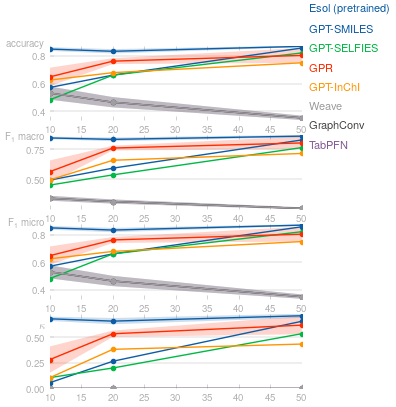

In [29]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

    # plot the binary case, i.e. num_classes = 2

    for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
        ax[i].plot(
            grouped_res.loc[2, 'SMILES', :].index,
            grouped_res.loc[2, 'SMILES', :][metric]['mean'],
            marker='o',
            label='GPT-SMILES',
        )
        ax[i].fill_between(
            grouped_res.loc[2, 'SMILES', :].index,
            grouped_res.loc[2, 'SMILES', :][metric]['mean'] - grouped_res.loc[2, 'SMILES', :][metric]['sem'],
            grouped_res.loc[2, 'SMILES', :][metric]['mean'] + grouped_res.loc[2, 'SMILES', :][metric]['sem'],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_res.loc[2, 'SELFIES', :].index,
            grouped_res.loc[2, 'SELFIES', :][metric]['mean'],
            marker='o',
            label='GPT-SELFIES',
        )
        ax[i].fill_between(
            grouped_res.loc[2, 'SELFIES', :].index,
            grouped_res.loc[2, 'SELFIES', :][metric]['mean'] - grouped_res.loc[2, 'SELFIES', :][metric]['sem'],
            grouped_res.loc[2, 'SELFIES', :][metric]['mean'] + grouped_res.loc[2, 'SELFIES', :][metric]['sem'],
            alpha=0.2,
        )


        ax[i].plot(
            grouped_res.loc[2, 'InChI', :].index,
            grouped_res.loc[2, 'InChI', :][metric]['mean'],
            marker='o',
            label='GPT-InChI',
        )
        ax[i].fill_between(
            grouped_res.loc[2, 'InChI', :].index,
            grouped_res.loc[2, 'InChI', :][metric]['mean'] - grouped_res.loc[2, 'InChI', :][metric]['sem'],
            grouped_res.loc[2, 'InChI', :][metric]['mean'] + grouped_res.loc[2, 'InChI', :][metric]['sem'],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_xgboost_res.loc[2,:].index,
            grouped_xgboost_res.loc[2,:][metric]['mean'],
            marker='o',
            label='GPR'
        )
        ax[i].fill_between(
            grouped_xgboost_res.loc[2,:].index,
            grouped_xgboost_res.loc[2,:][metric]['mean'] - grouped_xgboost_res.loc[2,:][metric]['sem'],
            grouped_xgboost_res.loc[2,:][metric]['mean'] + grouped_xgboost_res.loc[2,:][metric]['sem'],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_tabpfn_res.loc[2,:].index,
            grouped_tabpfn_res.loc[2,:][metric]['mean'],
            marker='o',
            label='TabPFN'
        )
        ax[i].fill_between(
            grouped_tabpfn_res.loc[2,:].index,
            grouped_tabpfn_res.loc[2,:][metric]['mean'] - grouped_tabpfn_res.loc[2,:][metric]['sem'],
            grouped_tabpfn_res.loc[2,:][metric]['mean'] + grouped_tabpfn_res.loc[2,:][metric]['sem'],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_graph_conv_res.loc[2,:].index,
            grouped_graph_conv_res.loc[2,:][metric]['mean'],
            marker='o',
            label='GraphConv'
        )
        ax[i].fill_between(
            grouped_graph_conv_res.loc[2,:].index,
            grouped_graph_conv_res.loc[2,:][metric]['mean'] - grouped_graph_conv_res.loc[2,:][metric]['sem'],
            grouped_graph_conv_res.loc[2,:][metric]['mean'] + grouped_graph_conv_res.loc[2,:][metric]['sem'],
            alpha=0.2,
        )


        ax[i].plot(
            grouped_weave_res.loc[2,:].index,
            grouped_weave_res.loc[2,:][metric]['mean'],
            marker='o',
            label='Weave'
        )
        ax[i].fill_between(
            grouped_weave_res.loc[2,:].index,
            grouped_weave_res.loc[2,:][metric]['mean'] - grouped_weave_res.loc[2,:][metric]['sem'],
            grouped_weave_res.loc[2,:][metric]['mean'] + grouped_weave_res.loc[2,:][metric]['sem'],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_esol_res.loc[2,:].index,
            grouped_esol_res.loc[2,:][metric]['mean'],
            marker='o',
            label='Esol (pretrained)'
        )
        ax[i].fill_between(
            grouped_esol_res.loc[2,:].index,
            grouped_esol_res.loc[2,:][metric]['mean'] - grouped_esol_res.loc[2,:][metric]['sem'],
            grouped_esol_res.loc[2,:][metric]['mean'] + grouped_esol_res.loc[2,:][metric]['sem'],
            alpha=0.2,
        )

    matplotx.line_labels(ax[0], fontsize=8)

    matplotx.ylabel_top('accuracy', ax=ax[0])
    matplotx.ylabel_top(r'F$_{1}$ macro', ax=ax[1])
    matplotx.ylabel_top(r'F$_{1}$ micro', ax=ax[2])
    matplotx.ylabel_top(r'$\kappa$', ax=ax[3])
    fig.savefig('solubility-classification_results_binary.pdf', bbox_inches='tight')

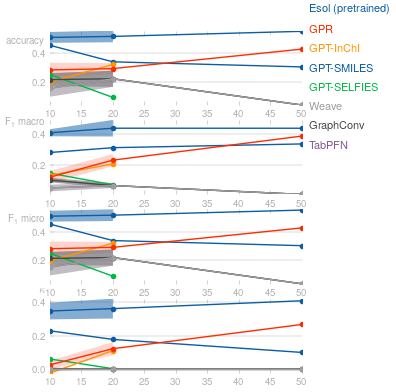

In [31]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

    # plot the binary case, i.e. num_classes = 2

    for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
        ax[i].plot(
            grouped_res.loc[5, 'SMILES', :].index,
            grouped_res.loc[5, 'SMILES', :][metric]['mean'],
            marker='o',
            label='GPT-SMILES',
        )
        ax[i].fill_between(
            grouped_res.loc[5, 'SMILES', :].index,
            grouped_res.loc[5, 'SMILES', :][metric]['mean'] - grouped_res.loc[5, 'SMILES', :][metric]['sem'],
            grouped_res.loc[5, 'SMILES', :][metric]['mean'] + grouped_res.loc[5, 'SMILES', :][metric]['sem'],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_res.loc[5, 'SELFIES', :].index,
            grouped_res.loc[5, 'SELFIES', :][metric]['mean'],
            marker='o',
            label='GPT-SELFIES',
        )
        ax[i].fill_between(
            grouped_res.loc[5, 'SELFIES', :].index,
            grouped_res.loc[5, 'SELFIES', :][metric]['mean'] - grouped_res.loc[5, 'SELFIES', :][metric]['sem'],
            grouped_res.loc[5, 'SELFIES', :][metric]['mean'] + grouped_res.loc[5, 'SELFIES', :][metric]['sem'],
            alpha=0.2,
        )


        ax[i].plot(
            grouped_res.loc[5, 'InChI', :].index,
            grouped_res.loc[5, 'InChI', :][metric]['mean'],
            marker='o',
            label='GPT-InChI',
        )
        ax[i].fill_between(
            grouped_res.loc[5, 'InChI', :].index,
            grouped_res.loc[5, 'InChI', :][metric]['mean'] - grouped_res.loc[5, 'InChI', :][metric]['sem'],
            grouped_res.loc[5, 'InChI', :][metric]['mean'] + grouped_res.loc[5, 'InChI', :][metric]['sem'],
            alpha=0.2,
        )

        
        ax[i].plot(
            grouped_xgboost_res.loc[5,:].index,
            grouped_xgboost_res.loc[5,:][metric]['mean'],
            marker='o',
            label='GPR'
        )
        ax[i].fill_between(
            grouped_xgboost_res.loc[5,:].index,
            grouped_xgboost_res.loc[5,:][metric]['mean'] - grouped_xgboost_res.loc[5,:][metric]['sem'],
            grouped_xgboost_res.loc[5,:][metric]['mean'] + grouped_xgboost_res.loc[5,:][metric]['sem'],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_tabpfn_res.loc[5,:].index,
            grouped_tabpfn_res.loc[5,:][metric]['mean'],
            marker='o',
            label='TabPFN'
        )
        ax[i].fill_between(
            grouped_tabpfn_res.loc[5,:].index,
            grouped_tabpfn_res.loc[5,:][metric]['mean'] - grouped_tabpfn_res.loc[5,:][metric]['sem'],
            grouped_tabpfn_res.loc[5,:][metric]['mean'] + grouped_tabpfn_res.loc[5,:][metric]['sem'],
            alpha=0.2,
        )


        ax[i].plot(
            grouped_graph_conv_res.loc[5,:].index,
            grouped_graph_conv_res.loc[5,:][metric]['mean'],
            marker='o',
            label='GraphConv'
        )
        ax[i].fill_between(
            grouped_graph_conv_res.loc[5,:].index,
            grouped_graph_conv_res.loc[5,:][metric]['mean'] - grouped_graph_conv_res.loc[5,:][metric]['sem'],
            grouped_graph_conv_res.loc[5,:][metric]['mean'] + grouped_graph_conv_res.loc[5,:][metric]['sem'],
            alpha=0.5,
        )


        ax[i].plot(
            grouped_weave_res.loc[5,:].index,
            grouped_weave_res.loc[5,:][metric]['mean'],
            marker='o',
            label='Weave'
        )
        ax[i].fill_between(
            grouped_weave_res.loc[5,:].index,
            grouped_weave_res.loc[5,:][metric]['mean'] - grouped_weave_res.loc[5,:][metric]['sem'],
            grouped_weave_res.loc[5,:][metric]['mean'] + grouped_weave_res.loc[5,:][metric]['sem'],
            alpha=0.5,
        )

        ax[i].plot(
            grouped_esol_res.loc[5,:].index,
            grouped_esol_res.loc[5,:][metric]['mean'],
            marker='o',
            label='Esol (pretrained)'
        )
        ax[i].fill_between(
            grouped_esol_res.loc[5,:].index,
            grouped_esol_res.loc[5,:][metric]['mean'] - grouped_esol_res.loc[5,:][metric]['sem'],
            grouped_esol_res.loc[5,:][metric]['mean'] + grouped_esol_res.loc[5,:][metric]['sem'],
            alpha=0.5,
        )


    matplotx.line_labels(ax[0], fontsize=8)

    matplotx.ylabel_top('accuracy', ax=ax[0])
    matplotx.ylabel_top(r'F$_{1}$ macro', ax=ax[1])
    matplotx.ylabel_top(r'F$_{1}$ micro', ax=ax[2])
    matplotx.ylabel_top(r'$\kappa$', ax=ax[3])
    fig.savefig('solubility-classification_results_5_class.pdf', bbox_inches='tight')